### Step 0

In [1]:
# CodeGrade step0

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris



### Step 1

In [2]:
# CodeGrade step0

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target



In [4]:
# Look at it
data.tail()

# Check for missing values
#data.isnull().sum()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# Visualize relationships
sns.boxplot(x='target', y='sepal length (cm)', data=data)
plt.title("Sepal Length by Type")
plt.show()

sns.boxplot(x='target', y='sepal width (cm)', data=data)
plt.title("Sepal Width by Type")
plt.show()

sns.boxplot(x='target', y='petal length (cm)', data=data)
plt.title("Petal Length by Type")
plt.show()

sns.boxplot(x='target', y='petal width (cm)', data=data)
plt.title("Petal Width by Type")
plt.show()



In [8]:
# CodeGrade step1

# Encode target variable as categorical
data = pd.get_dummies(data, dtype='int')

# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((120, 4), (30, 4), (120,), (30,))

### Step 2

In [9]:
# CodeGrade step0

# Train the SVM Model
# Initialize the SVM classifier with an RBF kernel
svc_model = SVC(kernel='rbf', C=1, probability=True)

# Train the model
svc_model.fit(X_train, y_train)

SVC(C=1, probability=True)

In [10]:
# CodeGrade step2

# Predict on the test data
y_pred = svc_model.predict(X_test)

### Step 3


In [15]:
# CodeGrade step3

# Classification report and confusion matrix
classification_report(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [16]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Step 4

In [17]:
# CodeGrade step0

# Optimize the Model
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [18]:
# CodeGrade step4

# Grid Search Best
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

### Step 5

In [19]:
# CodeGrade step0

# Train the optimized model
optimized_model = grid_search.best_estimator_
optimized_model.fit(X_train, y_train)

SVC(C=1, gamma=0.1, probability=True)

In [ ]:
# CodeGrade step5

# Get predicted probabilities for the positive class (class 1)
y_prob_opt = optimized_model.predict_proba(X_test)
positive_class_prob = y_prob_opt[:,1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, positive_class_prob, pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

np.float64(1.0)

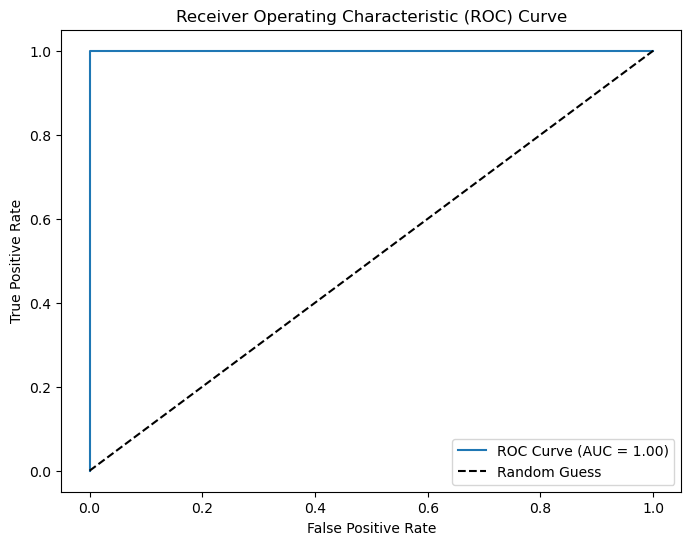

In [23]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()